In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.table import Table
from astropy import units as u
from astropy import coordinates as coords
from astroquery.simbad import Simbad
import astroquery
plt.style.use("fivethirtyeight")

In [3]:
malo = Table.read("../data/Malo/table3.dat", format='ascii.cds', readme="../data/Malo/ReadMe")

In [4]:
malo[:3]

YKG,Name,f_Name,SpT,RAh,RAm,RAs,DE-,DEd,DEm,DEs,pmRA,e_pmRA,pmDE,e_pmDE,r_pm,RV,e_RV,r_RV,Plx,e_Plx,r_Plx,Imag,r_Imag,Jmag,e_Jmag,r_Jmag,logFX,Uvel,e_Uvel,Vvel,e_Vvel,Wvel,e_Wvel,X,Y,Z
,,,,h,min,s,,deg,arcmin,arcsec,mas / yr,mas / yr,mas / yr,mas / yr,,km / s,km / s,,mas,mas,,mag,,mag,mag,,[mW/m2],km / s,km / s,km / s,km / s,km / s,km / s,pc,pc,pc
str5,str14,str1,str13,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,float64,str2,float64,float64,str3,float64,float64,str3,float64,str3,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
bPMG,HIP 560,--,F2IV,0,6,50.08,-,23,6,27.1,97.81,0.42,-47.12,0.21,--,6.5,3.5,an,25.39,0.38,--,5.74,--,5.45,0.02,--,-12.36,-11.0,0.4,-15.1,0.6,-10.2,3.4,4.5,5.9,-38.7
bPMG,HIP 10679,--,G2V,2,17,24.72,+,28,44,30.5,80.15,4.38,-78.4,4.91,--,4.99,1.26,an,36.58,5.83,--,7.06,--,6.57,0.02,--,-11.53,-9.0,1.3,-10.1,2.2,-7.2,1.1,-19.3,13.6,-13.9
bPMG,HIP 10680,--,F5V,2,17,25.27,+,28,44,42.3,87.6,2.12,-72.4,2.46,--,4.87,1.37,an,28.97,2.88,--,6.4,--,6.05,0.03,--,--,-11.4,1.3,-13.7,1.8,-7.2,0.9,-24.3,17.1,-17.5


In [5]:
np.unique(malo['YKG'])

ABDMG
ARG
CAR
COL
THA
TWA
bPMG


In [6]:
import palettable

In [7]:
colordict = {gname: palettable.tableau.Tableau_10.hex_colors[i] for i, gname in enumerate(np.unique(malo['YKG']))}
colordict

{'ABDMG': '#1F77B4',
 'ARG': '#FF7F0E',
 'CAR': '#2CA02C',
 'COL': '#D62728',
 'THA': '#9467BD',
 'TWA': '#8C564B',
 'bPMG': '#E377C2'}

In [8]:
malo['color'] = [colordict[name] for name in malo['YKG']]

In [9]:
dfstar = pd.read_csv("../../gaia-wide-binaries/db/table_star_new.csv")
g15 = dfstar.loc[dfstar.group_id==15]

In [10]:
df = pd.read_csv("../data/targets.csv")

In [11]:
dfmalo = malo.to_pandas()

In [12]:
nearbygroups = dfstar.loc[(dfstar.group_size>4) & (dfstar.tgas_distance<100)]
print(nearbygroups.group_id.unique().size)

12


In [17]:
dfmalo.groupby("YKG").count()

,Name,f_Name,SpT,RAh,RAm,RAs,DE-,DEd,DEm,DEs,...,Uvel,e_Uvel,Vvel,e_Vvel,Wvel,e_Wvel,X,Y,Z,color
YKG,,,,,,,,,,,,,,,,,,,,,
ABDMG,47,2,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
ARG,11,2,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
CAR,5,1,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
COL,21,2,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
THA,44,9,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
TWA,10,1,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
bPMG,39,5,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


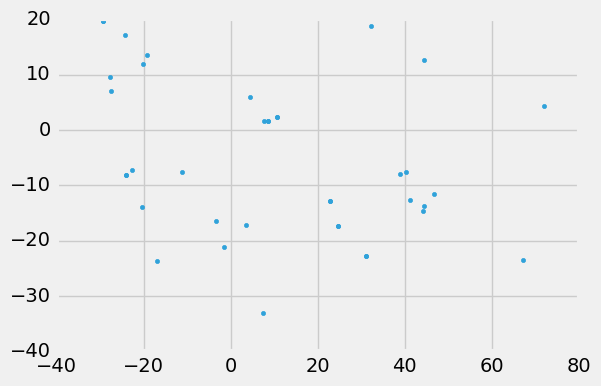

In [16]:
bPMG = dfmalo.groupby("YKG").get_group("bPMG")
plt.plot(bPMG.X, bPMG.Y, '.')

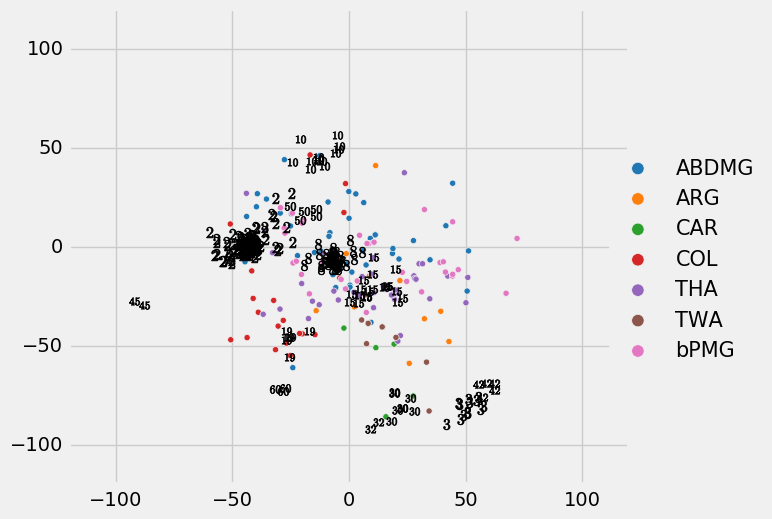

In [56]:
plt.figure(figsize=(8,5))
plt.axes([0.12,0.12,0.7,0.95])
for name, grp in dfmalo.groupby("YKG"):
    plt.scatter(grp.X, grp.Y, c=grp.color, label=name)
plt.figlegend(*plt.gca().get_legend_handles_labels(), 'right', scatterpoints=1, markerscale=2,
              fontsize=15)
for gid, grp in nearbygroups.groupby("group_id"):
    plt.scatter(grp.gx, grp.gy, marker=r"$ {} $".format(gid), color='k', s=60)
# plt.plot(g15['gx'], g15['gy'], 'ko', mew=1, mfc='None', mec='k', label='Group 10')
# plt.plot(df.gx, df.gy, 'bo', mew=1, mfc='None', mec='b', label='Group 15')

plt.xlim(-120,120);
plt.ylim(-120,120);